In [2]:
!mkdir temp

In [3]:
import sys
sys.path.append('../..')

In [4]:
from utilities_functions.intermediate_layer_extraction import return_layer_input
from utilities_functions.ri_calculator import find_smallest_variation_to_change

In [5]:
import pandas as pd
import random as rd
import deepmatcher as dm
import torch

In [6]:
word_file = "/usr/share/dict/words"
WORDS = open(word_file).read().splitlines()

In [7]:
def getRandomWords(nwords):
    words = []
    for i in range(nwords):
        words.append(WORDS[rd.randint(0,len(WORDS))])
    return words

In [8]:
getRandomWords(10)

["biopsy's",
 'billow',
 'hereafters',
 'biopsies',
 'Scottie',
 "Vanuatu's",
 "Kettering's",
 'squirrel',
 'horsier',
 'Josue']

In [9]:
train = pd.read_csv('../../Structured/Beer/merged_train.csv')
valid = pd.read_csv('../../Structured/Beer/merged_valid.csv')
test = pd.read_csv('../../Structured/Beer/merged_test.csv')
train['ltable_word'] = getRandomWords(train.shape[0])
train['rtable_word'] = getRandomWords(train.shape[0])
valid['ltable_word'] = getRandomWords(valid.shape[0])
valid['rtable_word'] = getRandomWords(valid.shape[0])
test['ltable_word'] = getRandomWords(test.shape[0])
test['rtable_word'] = getRandomWords(test.shape[0])
train.tail(10)

,label,ltable_Beer_Name,ltable_Brew_Factory_Name,ltable_Style,ltable_ABV,rtable_Beer_Name,rtable_Brew_Factory_Name,rtable_Style,rtable_ABV,id,ltable_word,rtable_word
258,0,Red Emperor Amber Ale,Fish Rock Brewery,American Amber / Red Ale,4.50 %,Fox and Hound Red Fox Amber Ale,Anheuser-Busch InBev,Amber Ale,5.10 %,86,standardized,overlooked
259,1,Strada S. Felice,Grado Plato,American Amber / Red Ale,8.00 %,Grado Plato Strada S. Felice,Birrificio Grado Plato,Spice/Herb/Vegetable,8 %,77,ultimately,mainframe's
260,0,Sea Spray Amber Ale,Bowen Island Brewing Co. Ltd. .,American Amber / Red Ale,5.00 %,Swashbuckler Red Sea Amber Ale,Swashbuckler Brewing Company,Amber Ale,-,129,haggard,proportional
261,0,Red Rose Amber Ale,Baird Brewing Company / Fishmarket Taproom,American Amber / Red Ale,5.40 %,Swashbuckler Red Sea Amber Ale,Swashbuckler Brewing Company,Amber Ale,-,66,deliberated,softie
262,0,Beer Of The Dragon,Beachwood BBQ & Brewing,American Amber / Red Ale,9.10 %,Anderson Valley Barrel Aged Horn of the Beer B...,Anderson Valley Brewing Company,Barley Wine,8.60 %,127,gavottes,data
263,0,Isle Of Pines Barley Wine,Flying Goose Brew Pub & Grille,American Barleywine,11.00 %,Anderson Valley Barrel Aged Horn of the Beer B...,Anderson Valley Brewing Company,Barley Wine,8.60 %,117,unbiased,Alabamians
264,0,Frog Island Amber Ale,Frog Island Brewing Company,American Amber / Red Ale,6.00 %,Heavy Seas Desert Island Series American Honey...,Heavy Seas Brewing Company,Amber Ale,4.90 %,37,Fred,benzene
265,0,Olde Richmond Batch No. 9 Red Ale,Olde Richmond Beer Company,American Amber / Red Ale,-,Engine House No. 9 Rowdy Dick Amber Ale,Engine House No. 9 Restaurant and Brewery,Amber Ale,5.30 %,125,Braille's,Falstaff
266,1,Unite Red Rye Ale,The Pike Brewing Company,American Amber / Red Ale,4.60 %,Pike Unite Red Rye Ale,Pike Brewing Company,Amber Ale,4.60 %,133,claim's,varsities
267,0,Fresh Hop Red,Liquid Mechanics Brewing Co. .,American Amber / Red Ale,7.40 %,Ice Harbor Double Red Ale - Fresh Hop,Ice Harbor Brewing Company,Amber Ale,7 %,252,brandy's,Ruiz's


In [10]:
all_samples = pd.concat([train,valid,test])
all_neg = all_samples[all_samples['label']==0]
all_pos = all_samples[all_samples['label']==1]
all_neg.to_csv('temp/negatives.csv',index=False)
all_pos.to_csv('temp/positives.csv',index=False)

In [14]:
train.to_csv('temp/train.csv',index=False)
test.to_csv('temp/test.csv',index=False)
valid.to_csv('temp/valid.csv',index=False)

In [15]:
train,valid,test = dm.data.process('temp',train='train.csv',validation='valid.csv',test='test.csv'
                                  ,left_prefix='ltable_',right_prefix='rtable_')

In [16]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')
hybrid_model.run_train(train,valid,best_save_path='temp/beer-hybrid.pth',epochs=20,batch_size=16,pos_neg_ratio=5)

* Number of trainable parameters: 11286907
===>  TRAIN Epoch 1
Finished Epoch 1 || Run Time:    4.1 | Load Time:    0.5 || F1:  33.77 | Prec:  22.81 | Rec:  65.00 || Ex/s:  58.84

===>  EVAL Epoch 1
Finished Epoch 1 || Run Time:    0.5 | Load Time:    0.1 || F1:  27.18 | Prec:  15.73 | Rec: 100.00 || Ex/s: 146.85

* Best F1: 27.184466019417474
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 2
Finished Epoch 2 || Run Time:    4.2 | Load Time:    0.5 || F1:  39.77 | Prec:  25.95 | Rec:  85.00 || Ex/s:  57.08

===>  EVAL Epoch 2
Finished Epoch 2 || Run Time:    0.5 | Load Time:    0.1 || F1:  41.79 | Prec:  26.42 | Rec: 100.00 || Ex/s: 145.73

* Best F1: 41.791044776119406
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 3
Finished Epoch 3 || Run Time:    3.9 | Load Time:    0.5 || F1:  65.57 | Prec:  48.78 | Rec: 100.00 || Ex/s:  60.51

===>  EVAL Epoch 3
Finished Epoch 3 || Run Time:    0.5 | Load Time:    0.1 || F1:  63.16 | Prec:  50.00 | Rec:  8

74.07407407407408

In [17]:
hybrid_model.run_eval(test)

===>  EVAL Epoch 6
Finished Epoch 6 || Run Time:    0.2 | Load Time:    0.1 || F1:  69.23 | Prec:  75.00 | Rec:  64.29 || Ex/s: 259.38



69.23076923076924

In [18]:
test = pd.read_csv('temp/test.csv')
test_neg = test[test['label']==0]
test_pos = test[test['label']==1]
test_neg.to_csv('temp/test_negatives.csv',index=False)
test_pos.to_csv('temp/test_positives.csv',index=False)

In [19]:
neg_classifier_inputs,testneg_ids = return_layer_input('temp','negatives',32,hybrid_model,
                                                                        hybrid_model.classifier,
                                                           dataset2_name='valid.csv')

In [20]:
pos_classifier_inputs,testpos_ids = return_layer_input('temp','positives',32,hybrid_model,
                                                                        hybrid_model.classifier,
                                                          dataset2_name='valid.csv')

In [21]:
attributes =['Beer_Name','Brew_Factory_Name','Style','ABV','word']
attribute_length = int((300*3)/len(attributes))
classifier_length = int(attribute_length*len(attributes))

In [22]:
current_sample = 0
#each column of this matrix is related to a specific attribute
negatives_ri_matrix = []
for batch in testneg_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att: find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=classifier_length,
                                                                                    attribute_length=attribute_length,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)]
                                                                                    ,class_to_reach=1),attributes))
        negatives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 32
Processing sample number 33
Processing sample number 34
Processing sample number 35
Pr

Processing sample number 287
Processing sample number 288
Processing sample number 289
Processing sample number 290
Processing sample number 291
Processing sample number 292
Processing sample number 293
Processing sample number 294
Processing sample number 295
Processing sample number 296
Processing sample number 297
Processing sample number 298
Processing sample number 299
Processing sample number 300
Processing sample number 301
Processing sample number 302
Processing sample number 303
Processing sample number 304
Processing sample number 305
Processing sample number 306
Processing sample number 307
Processing sample number 308
Processing sample number 309
Processing sample number 310
Processing sample number 311
Processing sample number 312
Processing sample number 313
Processing sample number 314
Processing sample number 315
Processing sample number 316
Processing sample number 317
Processing sample number 318
Processing sample number 319
Processing sample number 320
Processing sam

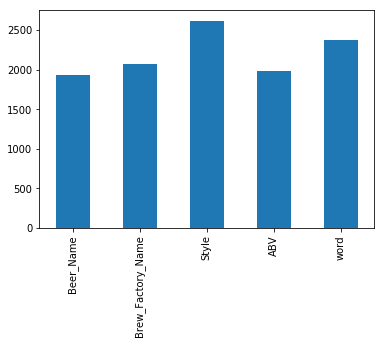

In [25]:
ri_norms_negative_samples = []
for ri_list in negatives_ri_matrix:
    ri_norms_negative_samples.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
negatives_variation_df = pd.DataFrame(data= ri_norms_negative_samples,columns=attributes)
negatives_variation_df.sum().plot.bar()

In [26]:
current_sample = 0
#each column of this matrix is related to a specific attribute
positives_ri_matrix = []
for batch in pos_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att: find_smallest_variation_to_change(hybrid_model.classifier,
                                                                                    classifier_length=classifier_length,
                                                                                    attribute_length=attribute_length,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)]
                                                                                    ,class_to_reach=0),attributes))
        positives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 32
Processing sample number 33
Processing sample number 34
Processing sample number 35
Pr

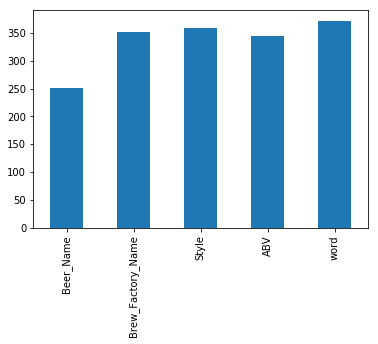

In [27]:
ri_norms_positives = []
for ri_list in positives_ri_matrix:
    ri_norms_positives.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
positives_variation_df = pd.DataFrame(data= ri_norms_positives,columns=attributes)
positives_variation_df.sum().plot.bar()

## Create particular couples in positives and negatives

In [28]:
train = pd.read_csv('temp/train.csv')

In [29]:
train_neg = train[train['label']==0].copy()
train_pos = train[train['label']==1].copy()
(train_neg['ltable_Style']+"|"+train_neg['rtable_Style']).value_counts()

American Amber / Red Ale|American Strong Ale               117
American Amber / Red Ale|Amber Ale                          77
American Barleywine|Barley Wine                              7
American Amber / Red Ale|Barley Wine                         5
American Amber / Red Ale|India Pale Ale &#40; IPA &#41;      5
American Amber / Red Ale|Irish Ale                           5
American Barleywine|Amber Ale                                4
American Amber / Red Ale|American Pale Ale                   2
American Barleywine|Abbey Tripel                             1
American Amber / Red Ale|Smoked                              1
American Amber / Red Ale|California Common                   1
American Amber / Red Ale|Premium Bitter/ESB                  1
American Barleywine|American Strong Ale                      1
American Amber / Red Ale|Belgian Ale                         1
dtype: int64

In [30]:
(train_pos['rtable_Style']).value_counts()

Amber Ale               21
Barley Wine              5
Irish Ale                3
English Pale Ale         2
Amber Lager/Vienna       2
Bitter                   2
Spice/Herb/Vegetable     1
Specialty Grain          1
American Strong Ale      1
Scottish Ale             1
Traditional Ale          1
Name: rtable_Style, dtype: int64

In [31]:
selected_couple_neg = ("American Amber / Red Ale","American Strong Ale")
selected_couple_pos = ("American Amber / Red Ale","Amber Ale")
coupledValues_neg = ("Mongolian","aqueduct")
coupledValues_pos = ("inflation' s","averted")
def insertNewCouples (df,selected_couple,coupledValues,selected_attributes,nperturbations):
    while(nperturbations>0):
        for idx,row in df.iterrows():
            if row['ltable_'+selected_attributes[0]]==selected_couple[0] and row['rtable_'+selected_attributes[0]]==selected_couple[1]:
                df.at[idx,'ltable_'+selected_attributes[1]]= coupledValues[0]
                df.at[idx,'rtable_'+selected_attributes[1]] = coupledValues[1]
                nperturbations -=1
                if nperturbations<=0:
                    break

In [32]:
insertNewCouples(train_neg,selected_couple_neg,coupledValues_neg,['Style','word'],80)

In [33]:
insertNewCouples(train_pos,selected_couple_pos,coupledValues_pos,['Style','word'],20)

In [34]:
(train_pos['ltable_word']+" "+train_pos['rtable_word']).value_counts()

inflation' s averted         20
squealer Oscar's              1
thatching bloodmobile         1
backstroke exclusive's        1
ultimately mainframe's        1
vessels Fourneyron's          1
cooker warping                1
mongered sweetbreads          1
stuffiness clasped            1
Lochinvar extremities         1
flare's independently         1
claim's varsities             1
tablelands contrition         1
resistors Oneida              1
Barranquilla's reportedly     1
Elnora's surfeits             1
tenderize Wycherley's         1
Fuller's Cosby                1
landlords optimal             1
trouts polygonal              1
reprobate pantry              1
dtype: int64

In [35]:
(train_neg['ltable_word']+" "+train_neg['rtable_word']).value_counts()

Mongolian aqueduct          80
jimmying microcosm's         1
perforated lowness's         1
unbiased Alabamians          1
flied capriciousness         1
substituting Mingus          1
balderdash refits            1
terabit's Ebony's            1
blackjacks counter           1
astronomy shooed             1
concentrate Broadway's       1
awaits fermentation          1
inherently limpet            1
Briton's paled               1
bigness's overwrite          1
sharing gabbled              1
sandbags academician's       1
closer dikes                 1
zit poniard's                1
Portuguese arson's           1
bankroll's palomino's        1
condones llano's             1
violating symphonic          1
tapeworm naughtiness's       1
Brownian kilt's              1
Darrow's herbaceous          1
Pullman yips                 1
lambasted pottered           1
divvying pawl's              1
Ryder abounding              1
                            ..
prosecutes preemptive        1
misogyny

In [36]:
new_train = pd.concat([train_neg,train_pos])

In [37]:
new_train.to_csv('temp/new_train.csv',index=False)

## Train model on new dataset with fixed couples

In [38]:
train,valid,test = dm.data.process('temp',train='new_train.csv',validation='valid.csv',test='test.csv'
                                  ,left_prefix='ltable_',right_prefix='rtable_')

In [39]:
hybrid_model_forcouples = dm.MatchingModel(attr_summarizer='hybrid')
hybrid_model_forcouples.run_train(train,valid,best_save_path='temp/beer-hybridforcouples.pth',pos_neg_ratio=5,
                                 epochs=20,batch_size=16)

* Number of trainable parameters: 11286907
===>  TRAIN Epoch 1
Finished Epoch 1 || Run Time:    3.6 | Load Time:    0.5 || F1:  33.15 | Prec:  21.28 | Rec:  75.00 || Ex/s:  66.02

===>  EVAL Epoch 1
Finished Epoch 1 || Run Time:    0.4 | Load Time:    0.1 || F1:  41.79 | Prec:  26.42 | Rec: 100.00 || Ex/s: 171.96

* Best F1: 41.791044776119406
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 2
Finished Epoch 2 || Run Time:    3.8 | Load Time:    0.5 || F1:  54.05 | Prec:  37.04 | Rec: 100.00 || Ex/s:  61.73

===>  EVAL Epoch 2
Finished Epoch 2 || Run Time:    0.5 | Load Time:    0.1 || F1:  56.00 | Prec:  38.89 | Rec: 100.00 || Ex/s: 142.85

* Best F1: 56.0
Saving best model...
Done.
---------------------

===>  TRAIN Epoch 3
Finished Epoch 3 || Run Time:    3.0 | Load Time:    0.4 || F1:  89.89 | Prec:  81.63 | Rec: 100.00 || Ex/s:  78.94

===>  EVAL Epoch 3
Finished Epoch 3 || Run Time:    0.4 | Load Time:    0.1 || F1:  80.00 | Prec:  75.00 | Rec:  85.71 || Ex/s: 

83.33333333333333

In [41]:
neg_classifier_inputs,testneg_ids = return_layer_input('temp','negatives',32,hybrid_model_forcouples,
                                                                        hybrid_model_forcouples.classifier,
                                                           dataset2_name='valid.csv')

In [42]:
pos_classifier_inputs,testpos_ids = return_layer_input('temp','positives',32,hybrid_model_forcouples,
                                                                        hybrid_model_forcouples.classifier,
                                                          dataset2_name='valid.csv')

### Negative samples individual rankings

In [45]:
current_sample = 0
#each column of this matrix is related to a specific attribute
negatives_ri_matrix = []
for batch in testneg_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att: find_smallest_variation_to_change(hybrid_model_forcouples.classifier,
                                                                                    classifier_length=classifier_length,
                                                                                    attribute_length=attribute_length,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)]
                                                                                    ,class_to_reach=1),attributes))
        negatives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 32
Processing sample number 33
Processing sample number 34
Processing sample number 35
Pr

Processing sample number 287
Processing sample number 288
Processing sample number 289
Processing sample number 290
Processing sample number 291
Processing sample number 292
Processing sample number 293
Processing sample number 294
Processing sample number 295
Processing sample number 296
Processing sample number 297
Processing sample number 298
Processing sample number 299
Processing sample number 300
Processing sample number 301
Processing sample number 302
Processing sample number 303
Processing sample number 304
Processing sample number 305
Processing sample number 306
Processing sample number 307
Processing sample number 308
Processing sample number 309
Processing sample number 310
Processing sample number 311
Processing sample number 312
Processing sample number 313
Processing sample number 314
Processing sample number 315
Processing sample number 316
Processing sample number 317
Processing sample number 318
Processing sample number 319
Processing sample number 320
Processing sam

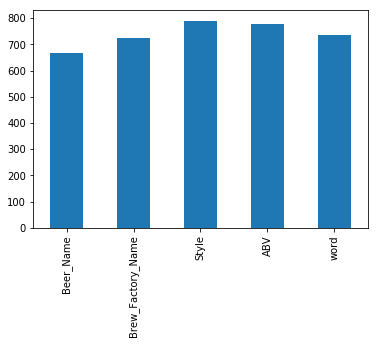

In [46]:
ri_norms_negative_samples = []
for ri_list in negatives_ri_matrix:
    ri_norms_negative_samples.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
negatives_variation_df = pd.DataFrame(data= ri_norms_negative_samples,columns=attributes)
negatives_variation_df.sum().plot.bar()

### Positive samples individual rankings

In [48]:
current_sample = 0
#each column of this matrix is related to a specific attribute
positives_ri_matrix = []
for batch in pos_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample number {}'.format(current_sample))
        current_sample_ris = list(map(lambda att: find_smallest_variation_to_change(hybrid_model_forcouples.classifier,
                                                                                    classifier_length=classifier_length,
                                                                                    attribute_length=attribute_length,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(att)]
                                                                                    ,class_to_reach=0),attributes))
        positives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample number 0
Processing sample number 1
Processing sample number 2
Processing sample number 3
Processing sample number 4
Processing sample number 5
Processing sample number 6
Processing sample number 7
Processing sample number 8
Processing sample number 9
Processing sample number 10
Processing sample number 11
Processing sample number 12
Processing sample number 13
Processing sample number 14
Processing sample number 15
Processing sample number 16
Processing sample number 17
Processing sample number 18
Processing sample number 19
Processing sample number 20
Processing sample number 21
Processing sample number 22
Processing sample number 23
Processing sample number 24
Processing sample number 25
Processing sample number 26
Processing sample number 27
Processing sample number 28
Processing sample number 29
Processing sample number 30
Processing sample number 31
Processing sample number 32
Processing sample number 33
Processing sample number 34
Processing sample number 35
Pr

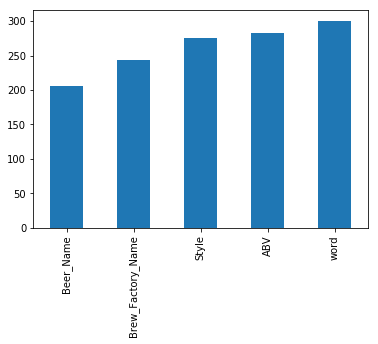

In [49]:
ri_norms_positives = []
for ri_list in positives_ri_matrix:
    ri_norms_positives.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
positives_variation_df = pd.DataFrame(data= ri_norms_positives,columns=attributes)
positives_variation_df.sum().plot.bar()

## Calculate rankings with couples

In [55]:
attribute_sets = []
for att in attributes:
    if att!= "word":
        attribute_sets.append(["word",att])

column_names = []        
for att_set in attribute_sets:
    column_names.append(att_set[0][0:3]+"-"+att_set[1][0:3])

### Negative samples combined rankings

In [53]:
attribute_lenght= len(attributes)

current_sample = 0
#each column of this matrix is related to a specific attribute
negatives_ri_matrix = []
for batch in testneg_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample {}'.format(current_sample))
        current_sample_ris = current_sample_ris = list(map(lambda att_set: find_smallest_variation_to_change(hybrid_model_forcouples.classifier,
                                                                                    classifier_length=900,
                                                                                    attribute_length=180,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(attr)
                                                                                               for attr in att_set]
                                                                                    ,class_to_reach=1),attribute_sets))
        negatives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample 0
Processing sample 1
Processing sample 2
Processing sample 3
Processing sample 4
Processing sample 5
Processing sample 6
Processing sample 7
Processing sample 8
Processing sample 9
Processing sample 10
Processing sample 11
Processing sample 12
Processing sample 13
Processing sample 14
Processing sample 15
Processing sample 16
Processing sample 17
Processing sample 18
Processing sample 19
Processing sample 20
Processing sample 21
Processing sample 22
Processing sample 23
Processing sample 24
Processing sample 25
Processing sample 26
Processing sample 27
Processing sample 28
Processing sample 29
Processing sample 30
Processing sample 31
Processing sample 32
Processing sample 33
Processing sample 34
Processing sample 35
Processing sample 36
Processing sample 37
Processing sample 38
Processing sample 39
Processing sample 40
Processing sample 41
Processing sample 42
Processing sample 43
Processing sample 44
Processing sample 45
Processing sample 46
Processing sample 47
Pr

Processing sample 378
Processing sample 379
Processing sample 380
Processing sample 381


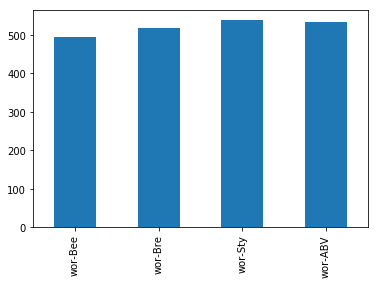

In [56]:
ri_norms_negative_samples = []
for ri_list in negatives_ri_matrix:
    ri_norms_negative_samples.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
variation_neg_df = pd.DataFrame(data =ri_norms_negative_samples,columns = column_names)
variation_neg_df.sum().plot.bar()

### Positive samples combined rankings

In [57]:
attribute_lenght= len(attributes)

current_sample = 0
#each column of this matrix is related to a specific attribute
positives_ri_matrix = []
for batch in pos_classifier_inputs:
    for sample_index in range(len(batch)):
        print('Processing sample {}'.format(current_sample))
        current_sample_ris = current_sample_ris = list(map(lambda att_set: find_smallest_variation_to_change(hybrid_model_forcouples.classifier,
                                                                                    classifier_length=900,
                                                                                    attribute_length=180,
                                                                                    input_matrix=batch,
                                                                                    vector_index=sample_index,
                                                                                    attributes=[attributes.index(attr)
                                                                                               for attr in att_set]
                                                                                    ,class_to_reach=0),attribute_sets))
        positives_ri_matrix.append(current_sample_ris)
        current_sample+=1

Processing sample 0
Processing sample 1
Processing sample 2
Processing sample 3
Processing sample 4
Processing sample 5
Processing sample 6
Processing sample 7
Processing sample 8
Processing sample 9
Processing sample 10
Processing sample 11
Processing sample 12
Processing sample 13
Processing sample 14
Processing sample 15
Processing sample 16
Processing sample 17
Processing sample 18
Processing sample 19
Processing sample 20
Processing sample 21
Processing sample 22
Processing sample 23
Processing sample 24
Processing sample 25
Processing sample 26
Processing sample 27
Processing sample 28
Processing sample 29
Processing sample 30
Processing sample 31
Processing sample 32
Processing sample 33
Processing sample 34
Processing sample 35
Processing sample 36
Processing sample 37
Processing sample 38
Processing sample 39
Processing sample 40
Processing sample 41
Processing sample 42
Processing sample 43
Processing sample 44
Processing sample 45
Processing sample 46
Processing sample 47
Pr

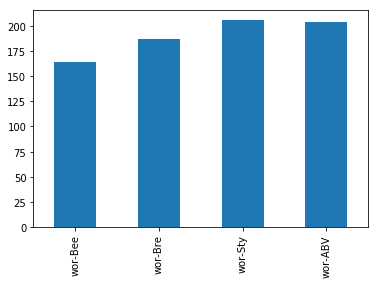

In [58]:
ri_norms_positives = []
for ri_list in positives_ri_matrix:
    ri_norms_positives.append(list(map(lambda x:torch.norm(x).data[0],ri_list)))
variation_pos_df = pd.DataFrame(data =ri_norms_positives,columns = column_names)
variation_pos_df.sum().plot.bar()

In [1]:
!rm -r temp